In [10]:
#import basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [11]:

!git clone https://github.com/straykid-aki/FLIR_HACKATHON

Cloning into 'FLIR_HACKATHON'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


#  LOADING TRAINING DATA






In [13]:
# Load Train Data from Data.xlsx in df_train
df_train = pd.read_excel("/content/FLIR_HACKATHON/Data.xlsx",sheet_name=0, index_col = "PLAYER")
df_train.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
PLAYER,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [14]:
# finding out missing values in data 
df_train.isnull().sum()


Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

In [15]:
df_train.shape #array shape

(100, 13)

In [16]:
df_train.dtypes #data type

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

CLEANING TRAINING DATA

In [18]:
# function to replace * in "High Score(HS)" Column
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('*', ''))
    return(x)

In [19]:
# * has been replaced with space
df_train['HS']  = df_train['HS'] .apply(clean_currency).astype('int64')
df_train['HS']

PLAYER
Aaron Finch          46
AB de Villiers       90
Abhishek Sharma      46
Ajinkya Rahane       65
Alex Hales           45
                     ..
Virat Kohli          92
Washington Sundar    35
Wriddhiman Saha      35
Yusuf Pathan         45
Yuvraj Singh         20
Name: HS, Length: 100, dtype: int64

In [20]:
df_train.loc[df_train.Avg == '-', 'Avg'] = df_train['2018_Runs'].loc[df_train.Avg == '-'].copy()
df_train.Avg = df_train.Avg.astype('float64')
df_train.head(50)



,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
PLAYER,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,424
Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,396
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165
Ambati Rayudu,16,16,2,602,100,43.00,402,149.75,1,3,53,34,521
Andre Russell,16,14,3,316,88,28.72,171,184.79,0,1,17,31,353
Andrew Tye,14,8,2,32,14,5.33,38,84.21,0,0,2,1,19
Axar Patel,9,8,2,80,19,13.33,69,115.94,0,0,3,4,80


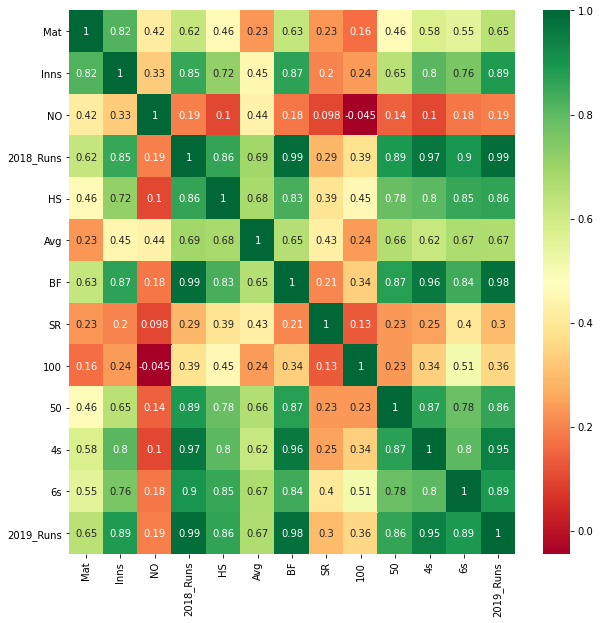

In [29]:
# To find out any feature which is less than 0 
corrmat = df_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

g = sns.heatmap(df_train[top_corr_features].corr(),annot=True, cmap="RdYlGn")

## LOADING TEST DATA

In [30]:
# Loading sheet 'Test_Data' from Data.xlsx into test_data pandas DataFrame 
df_test = pd.read_excel("/content/Hackathon/Data.xlsx",sheet_name=1, index_col = "PLAYER")
df_test.head()

,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


In [31]:
df_test.dtypes

Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
dtype: object

# CLEANING TEST DATA

In [33]:
df_test['HS']  = df_test['HS'] .apply(clean_currency).astype('int64')
df_test['HS']


PLAYER
David Warner         100
KL Rahul             100
Quinton de Kock       81
Shikhar Dhawan        97
Andre Russell         80
                    ... 
Carlos Brathwaite      6
Ishant Sharma         10
Shakib Al Hasan        9
Pawan Negi             5
Tim Southee            9
Name: HS, Length: 100, dtype: int64

In [34]:
df_test.loc[df_test.Avg == '-', 'Avg'] = df_test['2019_Runs'].loc[df_test.Avg == '-'].copy()
df_test.Avg = df_test.Avg.astype('float64')
df_test.head()

,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21
KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25
Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11
Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52


## LABELLING BOTH TEST AND TRAIN DATA

In [35]:
#independent and dependent features
X = df_train.iloc[:,:12]
y = df_train.iloc[:,12]
X

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30
Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...
Virat Kohli,14,14,3,530,92,48.18,381,139.10,0,4,52,18
Washington Sundar,7,6,3,65,35,21.66,38,171.05,0,0,5,4
Wriddhiman Saha,11,10,2,122,35,15.25,102,119.60,0,0,17,1


In [36]:
X['tot_runs'] = X['2018_Runs'].copy()
X = X.drop("2018_Runs", axis=1)
X.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,,
Aaron Finch,10,9,1,46,16.75,100,134.00,0,0,6,8,134
AB de Villiers,12,11,2,90,53.33,275,174.54,0,6,39,30,480
Abhishek Sharma,3,3,2,46,63.00,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,65,28.46,313,118.21,0,1,39,5,370
Alex Hales,6,6,0,45,24.66,118,125.42,0,0,13,6,148


In [37]:
X = X.drop("NO", axis=1)
X.head()

,Mat,Inns,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,
Aaron Finch,10,9,46,16.75,100,134.00,0,0,6,8,134
AB de Villiers,12,11,90,53.33,275,174.54,0,6,39,30,480
Abhishek Sharma,3,3,46,63.00,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,65,28.46,313,118.21,0,1,39,5,370
Alex Hales,6,6,45,24.66,118,125.42,0,0,13,6,148


In [38]:
X_test = df_test.copy(True)
X_test['tot_runs'] = X_test['2019_Runs'].copy()
X_test = X_test.drop('2019_Runs', axis=1)
X_test = X_test.drop("NO", axis=1)
X.head()
X_test.head()

,Mat,Inns,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,
David Warner,12,12,100,69.20,481,143.86,1,8,57,21,692
KL Rahul,14,14,100,53.90,438,135.38,1,6,49,25,593
Quinton de Kock,16,16,81,35.26,398,132.91,0,4,45,25,529
Shikhar Dhawan,16,16,97,34.73,384,135.67,0,5,64,11,521
Andre Russell,14,13,80,56.66,249,204.81,0,4,31,52,510


## TRAIN, VALIDATING AND TEST SET SPLITTING

In [40]:
#import Sklear
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
pd.plotting.register_matplotlib_converters()

In [41]:
# Splitting data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, test_size=0.15,random_state=0)

# NN MODEL ARCHITECTURE AND TRAINING

In [43]:
#import Tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [44]:
# Initialising the ANN
classifier = tf.keras.Sequential([tf.keras.layers.Dense(1000, 'relu', input_dim = 11),
      tf.keras.layers.Dense(500, 'relu'),
      tf.keras.layers.Dense(250, 'relu'),
      tf.keras.layers.Dense(125, 'relu'),
      tf.keras.layers.Dense(25, 'relu'),
      tf.keras.layers.Dense(5, 'relu'),
      
      
      tf.keras.layers.Dense(1)
])


classifier.compile(optimizer='adam',loss = 'MSE')
classifier.fit(X_train, y_train, epochs = 1200, validation_data=(X_valid, y_valid))

    
    


# Compiling the ANN
#classifier.compile(loss='MSE', optimizer='Adam')

  # Fitting the ANN to the Training set
#model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.2, batch_size = 20, nb_epoch = 500)

  


Epoch 1/1200
3/3 [==============================] - 0s 66ms/step - loss: 34807.9062 - val_loss: 2005.9125
Epoch 2/1200
3/3 [==============================] - 0s 12ms/step - loss: 6773.9146 - val_loss: 3462.6672
Epoch 3/1200
3/3 [==============================] - 0s 15ms/step - loss: 1913.6305 - val_loss: 5312.8770
Epoch 4/1200
3/3 [==============================] - 0s 13ms/step - loss: 3931.4148 - val_loss: 519.7980
Epoch 5/1200
3/3 [==============================] - 0s 13ms/step - loss: 956.4858 - val_loss: 3106.4287
Epoch 6/1200
3/3 [==============================] - 0s 12ms/step - loss: 2076.1406 - val_loss: 347.9965
Epoch 7/1200
3/3 [==============================] - 0s 12ms/step - loss: 772.4900 - val_loss: 1402.5066
Epoch 8/1200
3/3 [==============================] - 0s 12ms/step - loss: 1439.4354 - val_loss: 354.0725
Epoch 9/1200
3/3 [==============================] - 0s 12ms/step - loss: 652.1206 - val_loss: 1341.6895
Epoch 10/1200
3/3 [==============================] - 0s 12ms

In [45]:
#prediction
predictions = pd.Series(classifier.predict(X_test).reshape(len(X_test.index)), index= df_test.index)

In [46]:
#predicted values are placed under 2020_runs
df_test['2020_Runs'] = predictions.astype('int64')
df_test

,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s,2020_Runs
PLAYER,,,,,,,,,,,,,
David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,666
KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,563
Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,490
Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,475
Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carlos Brathwaite,2,2,0,11,6,5.50,10,110.00,0,0,1,0,8
Ishant Sharma,13,3,3,10,10,10.00,3,333.33,0,0,1,1,10
Shakib Al Hasan,3,1,0,9,9,9.00,10,90.00,0,0,0,0,9


In [48]:
#saving the result in excel sheet
df_test.to_excel("/content/FLIR_HACKATHON/result.xlsx", sheet_name= 'Predicted_Data', columns= df_test.columns)